# GPT2

From huggingface transformers

In [2]:
from transformers import GPT2LMHeadModel


In [4]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  # 124M

# Raw tensors
sd_hf = model_hf.state_dict()
for k, v in sd_hf.items():
    print(k, v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [10]:
# Flatten out the positional embedding
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

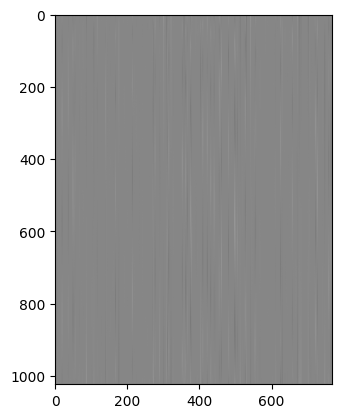

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize position embeddings. Every row is a different fixed absolute
# position in the range from 0 to 1024. Each columns is the representation
# of that position.
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

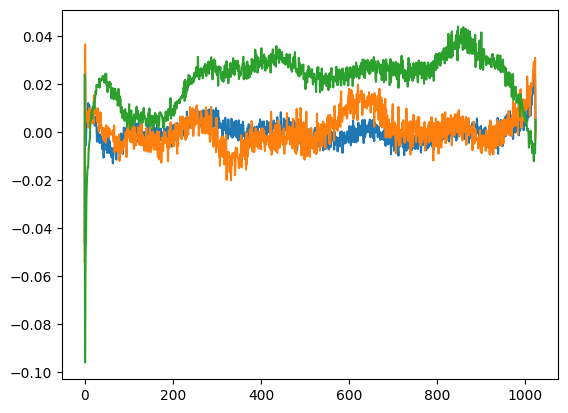

In [14]:
# Grab 3 random columns to visualize. Look at what the channels are doing as a
# function of position. Some channels respond more or less to parts of the
# position. Because these are jagged, we conclude this is an under trained model.
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

In [20]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(42)
generator("Hello, I am a language model,", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I am a language model, for you" —Miles Teller, The Times, Aug. 21, 1879\n\nI have'},
 {'generated_text': "Hello, I am a language model, I've had years of experience with languages, but here I am a native speaker. So I was interested in"},
 {'generated_text': 'Hello, I am a language model, I need to understand and understand languages.\n\nBut I am not the native speaker of a language.\n'},
 {'generated_text': 'Hello, I am a language model, this is my life. You can think of every single thing as a system, this is your reality and what'},
 {'generated_text': 'Hello, I am a language model, not a language model. I am thinking of the languages in which we have to speak. One way to think'}]